In [685]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [523]:
df= pd.read_csv("Bengaluru_House_Data.csv")

In [524]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [525]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Exploratory data analysis:

### 1.Stats:

In [526]:
df.shape

(13320, 9)

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [528]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [530]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [531]:
df1 = df.drop(['society','balcony'],axis='columns')
df1.shape

(13320, 7)

In [532]:
df1.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

## Data Cleaning

In [533]:
# Dealing with null values:

In [534]:
df2 = df1.dropna(subset="location")

In [535]:
df2["size"] = df2["size"].fillna("2 BHk")

In [536]:
df2["bath"] = df2["bath"].fillna(df2["bath"].median())

In [537]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  object 
 1   availability  13319 non-null  object 
 2   location      13319 non-null  object 
 3   size          13319 non-null  object 
 4   total_sqft    13319 non-null  object 
 5   bath          13319 non-null  float64
 6   price         13319 non-null  float64
dtypes: float64(2), object(5)
memory usage: 832.4+ KB


In [538]:
# unique values in size:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '2 BHk', '9 Bedroom', '27 BHK', '10 Bedroom',
       '11 Bedroom', '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK',
       '8 BHK', '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [540]:
def get_bhk(x):
    try:
        token = x.split(" ")
        return int(token[0])
    except:
        return ""

In [541]:
df2["bhk"] = df2["size"].apply(get_bhk)

In [542]:
df2

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [543]:
# unique values in size:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [544]:
# transforming total_sqft to just include int values of total_sqft:

In [545]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [546]:
df2[~df2['total_sqft'].apply(is_float)].head(10) 

,area_type,availability,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [547]:
def val_int(x):
        token = x.split("-")
        if len(token)==2:
            return (float(token[0]) + float(token[1]))/2
        try:
            return float(x)
        except:
            return None  

In [548]:
df3 =df2.copy()
df3.total_sqft = df2.total_sqft.apply(val_int)
df3.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [549]:
df3[~df3['total_sqft'].apply(is_float)].value_counts()

Series([], dtype: int64)

In [550]:
df3.isnull().sum()

area_type        0
availability     0
location         0
size             0
total_sqft      46
bath             0
price            0
bhk              0
dtype: int64

In [551]:
# removing null values of total_sqft
df4 = df3.dropna(subset='total_sqft')

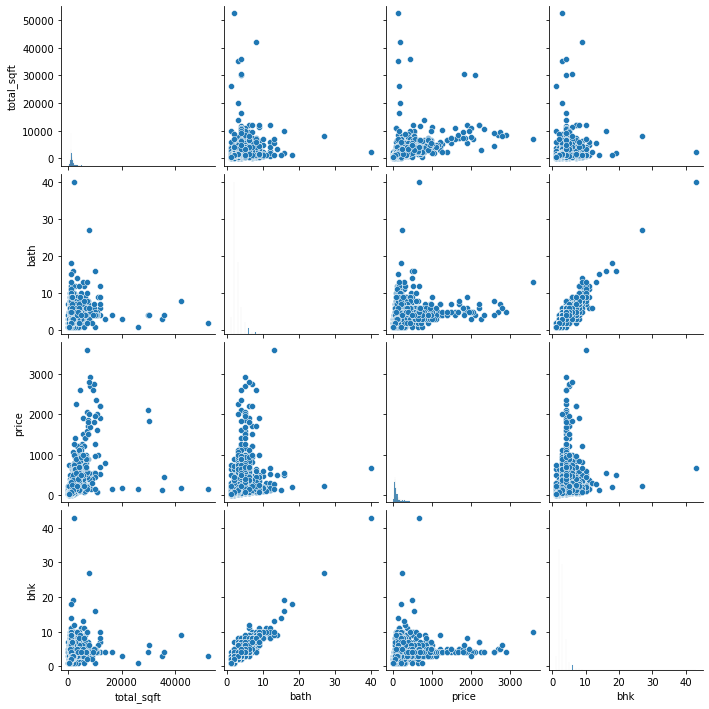

In [622]:
sns.pairplot(df4)

In [552]:
# Creating a price per sqft column:
df5 = df4.copy()
df5['price_per_sqft']= df4['price']*100000/df5['total_sqft']
df5.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [553]:
# Reducing the dimensionality of location:

In [554]:
len(df5["location"].unique())

1299

In [555]:
df5.location =  df5.location.apply(lambda x : x.strip(" "))
location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield               539
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
Kanakapura Main Road       1
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
whitefiled                 1
Name: location, Length: 1288, dtype: int64

In [556]:
print(len(location_stats[location_stats]<=10))
loc_less = location_stats[location_stats <=10]

1288


In [557]:
df5.location = df5.location.apply(lambda x: 'other' if x in loc_less else x) 

In [558]:
len(df5.location.unique())

241

<AxesSubplot:xlabel='location', ylabel='count'>

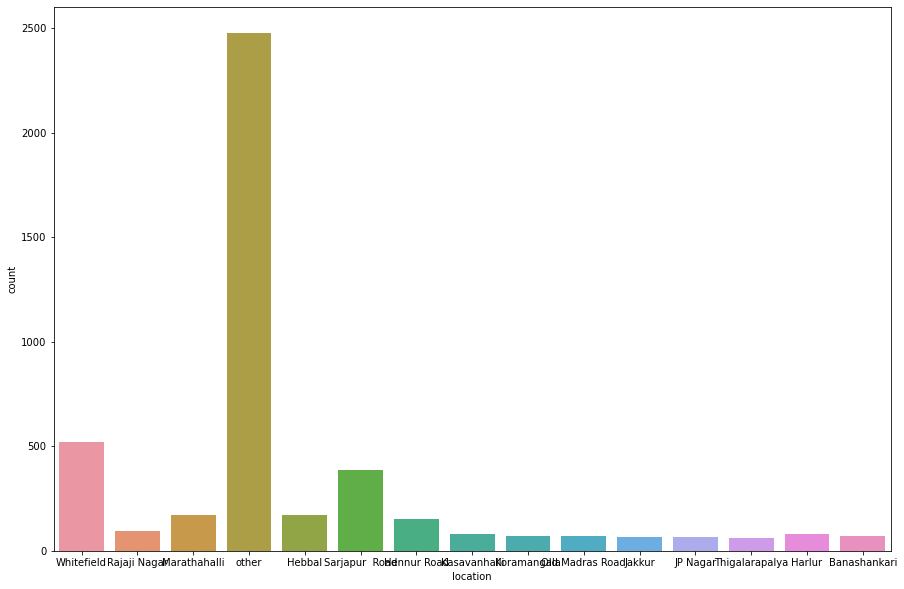

In [659]:
plt.figure(figsize=(15, 10))
df_filtered = df5.groupby("location").filter(lambda x: len(x) > 50 and x['price'].mean() > 100)
sns.countplot(x="location", data=df_filtered)

In [559]:
# Reducing the dimensionality of availbility:

In [560]:
df5.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [561]:
def availability_div(x):
    m=str(x)
    token = m.split("-")

    try:
        if len(token)>1:
            return "Soon to be vacated"
        else:
            return x
    except:
        return ""

In [562]:
df5["availability"] =  df5["availability"].apply(availability_div)
df5

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Soon to be vacated,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Super built-up Area,Ready To Move,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Soon to be vacated,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


<AxesSubplot:xlabel='availability', ylabel='count'>

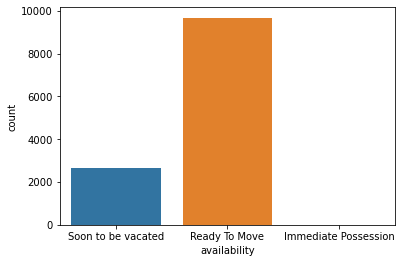

In [640]:
sns.countplot(x="availability",data=df5)

In [563]:
# Removing outliers:

In [564]:
# for sqft per bhk:
df5["sqft_per_bhk"]= df5["total_sqft"]/df5["bhk"]
df5

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk
0,Super built-up Area,Soon to be vacated,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.00
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.00
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926,690.60
13316,Super built-up Area,Ready To Move,other,4 BHK,3600.0,5.0,400.00,4,11111.111111,900.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136,570.50
13318,Super built-up Area,Soon to be vacated,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319,1172.25


In [565]:
df5[df5["sqft_per_bhk"]<300].count()

area_type         744
availability      744
location          744
size              744
total_sqft        744
bath              744
price             744
bhk               744
price_per_sqft    744
sqft_per_bhk      744
dtype: int64

In [566]:
df5 = df5[~(df5["sqft_per_bhk"] < 300)]
df5 = df5[~(df5["sqft_per_bhk"] > 1200)]

<AxesSubplot:xlabel='sqft_per_bhk', ylabel='Density'>

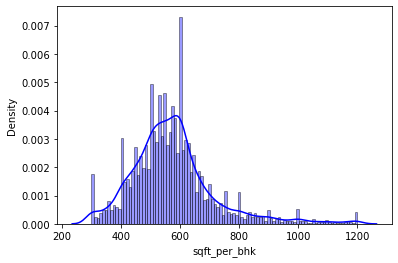

In [567]:
sns.distplot(df5["sqft_per_bhk"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [568]:
# for pricr per sqft:
df5["price_per_sqft"] = df5["price"] * 100000 / df5["total_sqft"]

In [569]:
df5.price_per_sqft.describe()

count     12341.000000
mean       6231.112021
std        4041.927583
min         500.000000
25%        4202.713488
50%        5273.311897
75%        6857.142857
max      176470.588235
Name: price_per_sqft, dtype: float64

In [570]:
def remove_pps_out(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[((subdf.price_per_sqft)>(m-st)) & ((subdf.price_per_sqft)<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [571]:
df6 = remove_pps_out(df5)
df6.shape

(10151, 10)

<AxesSubplot:xlabel='bhk', ylabel='price_per_sqft'>

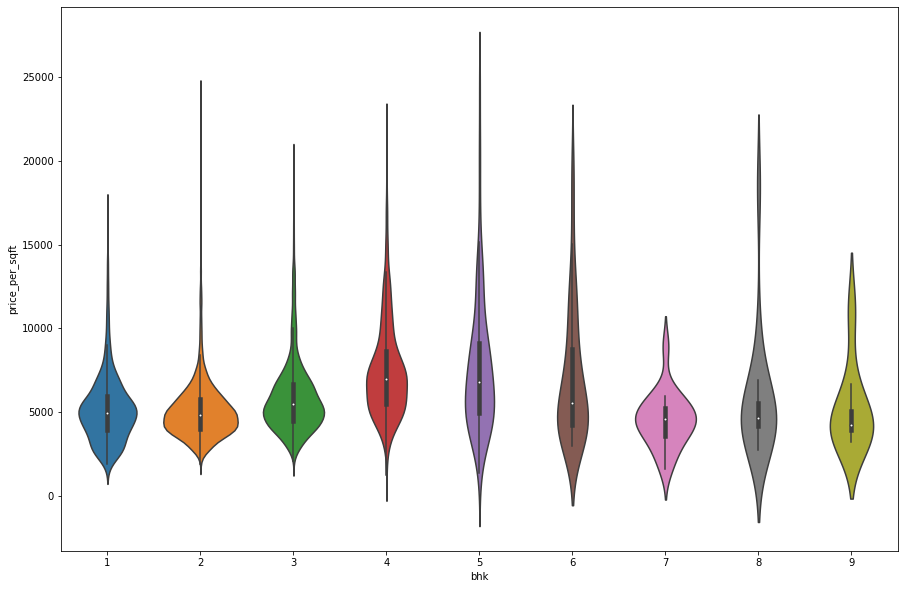

In [684]:
plt.figure(figsize=(15, 10))
sns.violinplot(x=df6.bhk[df6.bhk<10],y=df6.price_per_sqft)

In [572]:
# to remove ouliers in cases where price per sqft of 2bhk is greater than 3 bhk

In [573]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in d f.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [574]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7211, 10)

Text(0, 0.5, 'Count')

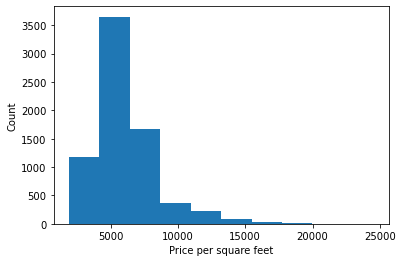

In [575]:
plt.hist(df7.price_per_sqft,rwidth=1)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [576]:
# removing outliers in bath:
df8 = df7[df7.bath<df7.bath+2]
df8.shape

(7211, 10)

<AxesSubplot:>

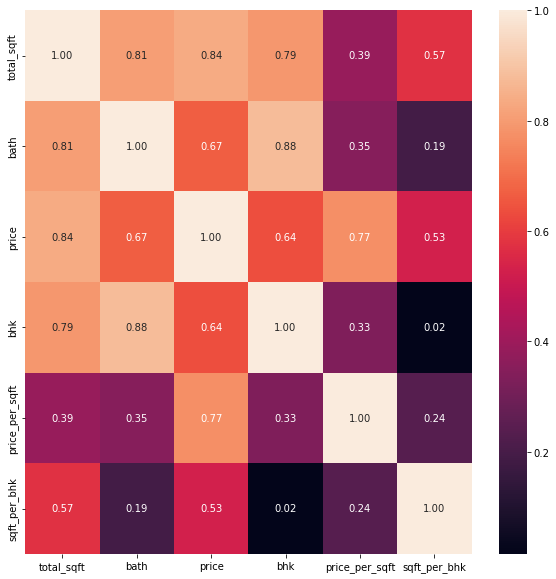

In [577]:
# Dropping features based on correlation:
plt.figure(figsize=(10,10))
co_relation= df8.corr()
sns.heatmap(data=co_relation,annot=True,fmt = ".2f")

In [578]:
# as price_per_sqft and sqft_per_bhk are derived colums, we will drop that
df8.drop(["price_per_sqft","sqft_per_bhk","size"],axis=1,inplace=True)
df8.head()

,area_type,availability,location,total_sqft,bath,price,bhk
0,Super built-up Area,Soon to be vacated,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,Soon to be vacated,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,Soon to be vacated,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,Soon to be vacated,1st Block Jayanagar,1235.0,2.0,148.0,2


In [579]:
price = df8["price"]
df8.drop(["price"], axis = 1, inplace = True)

In [580]:
df8= df8[["total_sqft", "bhk", "bath", "availability", "area_type", "location"]]

##  One hot encoding for categorical features:

In [686]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [581]:
le1 = LabelEncoder()
housing_availability = le1.fit_transform(df8.iloc[:,3])

In [582]:
le2 = LabelEncoder()
housing_area_type = le2.fit_transform(df8.iloc[:,4])

In [583]:
le3 = LabelEncoder()
housing_location = le3.fit_transform(df8.iloc[:,5])

In [584]:
ohe1 = OneHotEncoder()
housing_availability = ohe1.fit_transform(housing_availability.reshape(-1,1))
housing_availability = pd.DataFrame(housing_availability.toarray(), columns=le1.classes_)

In [585]:
ohe2 = OneHotEncoder()
housing_area_type = ohe2.fit_transform(housing_area_type.reshape(-1,1))
housing_area_type = pd.DataFrame(housing_area_type.toarray(), columns=le2.classes_)

In [586]:
ohe3 = OneHotEncoder()
housing_location = ohe3.fit_transform(housing_location.reshape(-1,1))
housing_location = pd.DataFrame(housing_location.toarray(), columns=le3.classes_)

In [ ]:
# Final data for model:

In [587]:
housing_availability.drop([housing_availability.columns[len(housing_availability.columns)-1]], axis=1, inplace = True)
housing_area_type.drop([housing_area_type.columns[len(housing_area_type.columns)-1]], axis=1, inplace = True)
housing_location.drop([housing_location.columns[len(housing_location.columns)-1]], axis=1, inplace = True)

In [588]:
housing_num_features = df8.iloc[:, 0:3].reset_index()
housing_num_features.drop(["index"], axis = 1, inplace = True)

In [589]:
# Feature Scaling:
std_scaler = StandardScaler()
housing_num_scaled_features = pd.DataFrame(std_scaler.fit_transform(housing_num_features), columns=housing_num_features.columns)

In [590]:
# Combining all relevant colums:
housing_for_model = pd.concat([housing_num_scaled_features, housing_availability, housing_area_type, housing_location], axis=1)
housing_for_model

,total_sqft,bhk,bath,Immediate Possession,Ready To Move,Built-up Area,Carpet Area,Plot Area,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.002846,1.638360,1.568122,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.243844,0.549191,0.563705,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.597086,0.549191,-0.440712,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.376132,0.549191,-0.440712,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.325669,-0.539978,-0.440712,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7206,-0.441013,-0.539978,-0.440712,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7207,-0.376132,-0.539978,-0.440712,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7208,-0.155536,-0.539978,-0.440712,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7209,-0.935552,-1.629146,-1.445129,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [592]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error


## Model Training and evaluation:

In [593]:
X, y = housing_for_model.values, price.values
X_train, X_test, y_train, y_test = train_test_split(housing_for_model, price, test_size = 0.2, random_state = 42)

In [613]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.8653143670506003

In [595]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.8640839723686349

In [596]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.7586613325679503

In [597]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.7423066989264999

In [598]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.8148813731594755

In [599]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test, y_test)

0.8641318688236074

In [606]:
# hyperparameter tuning the algorithms with best accuracy:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200, 300], 
            }
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [608]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.850805,{'normalize': False}
1,ridge,0.850690,{'alpha': 0.1}
2,xgboost,0.878880,{'n_estimators': 300}


In [610]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.8652252310509632

In [611]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X, y)
ridge_reg.score(X, y)

0.8651986985351416

In [614]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X, y)
xgb_reg.score(X, y)

0.9292231583221819

## The XGBRegressor model performed the best with a R2 score of 0.929.